In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\Admin\\diabetes_cleaned.csv")  # Use double slashes \\ or raw string


# Show basic info
print(df.shape)     # Rows and columns
print(df.columns)   # List of column names
df.head()           # Show first 5 rows

(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [4]:
# Step 1: Define features and target
X = df.drop('Outcome', axis=1)   # All columns except Outcome
y = df['Outcome']                # Target column

# Step 2: Scale the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# X_scaled is now ready for model training

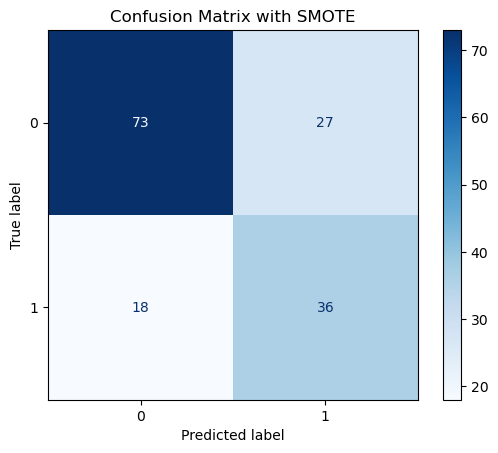

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       100
           1       0.57      0.67      0.62        54

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154

Accuracy: 0.7077922077922078


In [6]:
# STEP 1: Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# STEP 2: Split data with stratification (if not already done)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# STEP 3: Feature scaling (Standardize)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 4: Apply SMOTE on training data ONLY
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# STEP 5: Train Logistic Regression on balanced data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

# STEP 6: Make predictions
y_pred = model.predict(X_test_scaled)

# STEP 7: Evaluate the model
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix with SMOTE")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Optional: Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


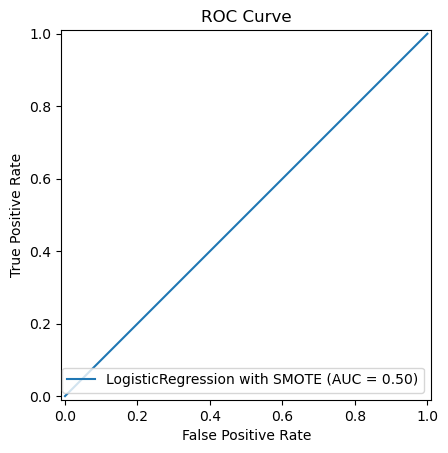

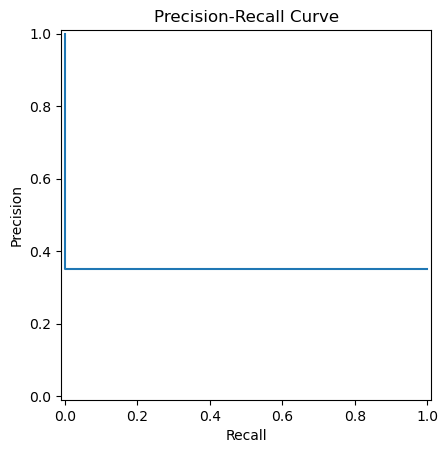

In [8]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Get predicted probabilities
y_scores = model.predict_proba(X_test)[:, 1]

# --- ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="LogisticRegression with SMOTE").plot()
plt.title("ROC Curve")
plt.show()

# --- Precision-Recall Curve ---
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title("Precision-Recall Curve")
plt.show()